In [189]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

Function to generate a D-dimensional vector where each component is drawn from a standard normal
distribution.

In [190]:
def generate_d_vector(dim):
    return np.random.standard_normal(size=dim)

D × D matrix A, where every column is a vector generated in this way.

In [191]:
def generate_dxd_matrix(dim):
    toret = []
    for i in range(dim):
        toret.append(np.random.standard_normal(size = dim))
    return toret

 Q = ATA.

In [192]:
def generate_Q(dim):
    A = generate_dxd_matrix(dim)
    At = np.transpose(A)
    return np.matmul(At,A)

F(x)= 12xTQx−xTc.

In [193]:
def compute_f(Q,x,c):
    xtQx = np.dot(0.5,np.matmul(np.transpose(x),np.matmul(Q,x)))
    xtc = np.matmul(np.transpose(x),c)
    return(np.subtract(xtQx,xtc))

gd(F) = Qx - c

In [194]:
def compute_gd(Q,x,c):
    Qx = np.matmul(Q,x)
    return(np.subtract(Qx,c))

xk+1 = xk - alpha*gd(f)

In [195]:
def compute_newx(x,alpha,gd):
    return(np.subtract(x,np.dot(alpha,gd)))

x* = Q-1c

In [196]:
def minimizer(Q,c):
    return np.matmul(np.linalg.inv(Q),c)

generating the intial c,x,Q

In [197]:
c = generate_d_vector(10)
x = generate_d_vector(10)
Q = generate_Q(10)

In [198]:
c2 = generate_d_vector(10)
x2 = generate_d_vector(10)
Q2 = generate_Q(10)

In [199]:
# print(x)
# print()
# print(Q)
# print()
# print(c)
# print()
# print(alpha)


In [200]:
def plot_graphs(f,e,angl):
    plt.title("Convergence of function F to minimum")
    plt.plot(f)
    plt.show()
    
    plt.title("Convergence of error E approaching the minimum")
    plt.plot(e)
    plt.show()
    
    plt.title("Convergence of error E log scale approaching the minimum")
    plt.plot(e)
    plt.yscale("log")
    plt.show()
    
    plt.title("Cosine during approach")
    plt.plot(angl)
    plt.show()

Vanilla Gradient Descent with constant alpha

In [201]:
def vanilla_gradient_descent(Q,x,c):
    f=[]
    e=[]
    alpha = 0.01
    angl = []
    x_min = minimizer(Q,c)
    print("The minimum:",x_min)
    temp = 100000000
    ctr = 0
    while(temp > 0.001):
        #computing the Fx for every x
        f.append(compute_f(Q,x,c))
        #xk
        last = x
        #xk+1
        x = compute_newx(x,alpha,compute_gd(Q,x,c))
        # || x* - xk ||
        temp = np.linalg.norm(x_min - last)
        #error convergence
        e.append(temp)
        #cosine convergence
        angl.append((np.matmul(np.transpose(x - last),x_min - last))/((np.linalg.norm(x - last))*temp))
        ctr+=1
    print(x)
    print(ctr)
    
    return f,e,angl
        
        
        

Gradient Descent with optimized alpha

In [202]:
def alpha_optimized_gradient_descent(Q,x,c):
    f=[]
    e=[]
    angl = []
    x_min = minimizer(Q,c)
    print("The minimum:",x_min)
    temp = 100000000
    ctr = 0
    while(temp > 0.001):
    #computing the Fx for every x
        f.append(compute_f(Q,x,c))
    #xk
        last = x
    #pk
        pk = compute_gd(Q,last,c)
        pkt = np.transpose(pk)
    #optimal alpha
        alphak = np.matmul(pkt,pk)/np.matmul(np.matmul(pkt,Q),pk)
    #xk+1
        x = compute_newx(x,alphak,compute_gd(Q,last,c))
    # || x* - xk ||
        temp = np.linalg.norm(x_min - last)
    #error convergence
        e.append(temp)
    #cosine convergence
        angl.append((np.matmul(np.transpose(x - last),x_min - last))/((np.linalg.norm(x - last))*temp))
        ctr+=1
    print(x)
    print(ctr) 
    
    return f,e,angl
    
    

Gradient Descent Algorithm Momentum 

In [203]:
def compute_newx_momentum(x,alphak,gd,betak,qk):
    return(np.add(np.subtract(x,np.dot(alphak,gd)),np.dot(betak,qk)))

Gradient Descent Algorithm Momentum with constant alpha and beta

In [204]:
def momentum_gradient_descent(Q,x,c):
    f=[]
    e=[]
    angl = []

    x_min = minimizer(Q,c)
    print("The minimum:",x_min)
    
    xk1 = [0]*10
    xk = x
    alpha = 0.01
    beta = 0.01
    pk = compute_gd(Q,xk,c)
    pkt = np.transpose(pk)
    qk = xk - xk1
    qkt = np.transpose(qk)
    x = compute_newx_momentum(x,alpha,compute_gd(Q,xk,c),beta,qk)

    temp = 100000000
    ctr = 0
    
    while(temp > 0.001):
    #computing the Fx for every x
        f.append(compute_f(Q,xk,c))
    #pk
        pk = compute_gd(Q,xk,c)
        pkt = np.transpose(pk)
    #qk
        qk = xk - xk1
        qkt = np.transpose(qk)
    #xk+1
        xk1 = xk
        xk = x
        x = compute_newx_momentum(x,alpha,compute_gd(Q,xk1,c),beta,qk)
       
    # || x* - xk ||
        temp = np.linalg.norm(x_min - xk1)
    #error convergence
        e.append(temp)
    #cosine convergence
        angl.append((np.matmul(np.transpose(x - xk1),x_min - xk1))/((np.linalg.norm(x - xk1))*temp)) 
        ctr+=1
        
    print(x)
    print(ctr) 
   
    return f,e,angl

Gradient Descent Algorithm Momentum with optimized alpha and beta

In [205]:
def optimized_momentum_gradient_descent(Q,x,c):
    f=[]
    e=[]
    angl = []
    
    x_min = minimizer(Q,c)
    print("The minimum:",x_min)
    
    xk1 = [0]*10
    xk = x
    pk = compute_gd(Q,xk,c)
    pkt = np.transpose(pk)
    qk = xk - xk1
    qkt = np.transpose(qk)
    
    qp = np.matmul(qkt,pk)
    pQp = np.matmul(np.matmul(pkt,Q),qk)
    pp = np.matmul(pkt,pk)
    qQq = np.matmul(np.matmul(qkt,Q),qk)
    pQq = np.matmul(np.matmul(pkt,Q),qk)
    
    alphak = ((qp*pQp - pp*qQq)/(pQp*pQp - qQq*pQp))
    betak = ((qp*pQp - pp*pQq)/(pQq*pQq - qQq*pQp))
    
    x = compute_newx_momentum(x,alphak,compute_gd(Q,xk,c),betak,qk)
    xk1 = xk
    xk = x

    temp = 100000000
    ctr = 0
    while(temp > 0.001):
    #computing the Fx for every x
        f.append(compute_f(Q,xk,c))
    #pk
        pk = compute_gd(Q,xk,c)
        pkt = np.transpose(pk)
    #qk
        qk = xk - xk1
        qkt = np.transpose(qk)
    #optimal alpha
        qp = np.matmul(qkt,pk)
        pQp = np.matmul(np.matmul(pkt,Q),pk)
        pp = np.matmul(pkt,pk)
        qQq = np.matmul(np.matmul(qkt,Q),qk)
        pQq = np.matmul(np.matmul(pkt,Q),qk)
        alphak = ((qp*pQq - pp*qQq)/(pQq*pQq - qQq*pQp))
        
    #optimal beta
        betak = ((qp*pQp - pp*pQq)/(pQq*pQq - qQq*pQp))
        
    #xk+1
        xk1 = xk
        xk = compute_newx_momentum(xk,alphak,compute_gd(Q,xk,c),betak,qk)
        
        
    # || x* - xk ||
        temp = np.linalg.norm(x_min - xk1)
        
    #error convergence
        e.append(temp)  
    
    #cosine convergence
        angl.append((np.matmul(np.transpose(xk - xk1),x_min - xk1))/((np.linalg.norm(xk - xk1))*temp)) 
        ctr+=1     
    
    print(xk)
    print(ctr)
    return f,e,angl
    

Better Direction

In [206]:
def orthogonal_momentum_gradient_descent(Q,x,c):
    f=[]
    e=[]
    angl = []
    
    x_min = minimizer(Q,c)
    print("The minimum:",x_min)
    
    xk1 = [0]*10
    xk = x
    pk = compute_gd(Q,xk,c)
    pkt = np.transpose(pk)
    qk = generate_d_vector(10)
    qk = np.dot((np.dot(pkt,qk)/np.dot(pkt,pk)),pk)
    qkt = np.transpose(qk)
    
    qp = np.matmul(qkt,pk)
    pQp = np.matmul(np.matmul(pkt,Q),qk)
    pp = np.matmul(pkt,pk)
    qQq = np.matmul(np.matmul(qkt,Q),qk)
    pQq = np.matmul(np.matmul(pkt,Q),qk)
    
    alphak = ((pp*qQq)/(pQp*pQp - qQq*pQp))
    betak = ((pp*pQq)/(pQq*pQq - qQq*pQp))
    
    x = compute_newx_momentum(x,alphak,compute_gd(Q,xk,c),betak,qk)
    xk1 = xk
    xk = x

    temp = 100000000
    ctr = 0
    while(temp > 0.001):
    #computing the Fx for every x
        f.append(compute_f(Q,xk,c))
    #pk
        pk = compute_gd(Q,xk,c)
        pkt = np.transpose(pk)
    #qk
        qk = generate_d_vector(10)
        qk -= np.dot((np.dot(pkt,qk)/np.dot(pkt,pk)),pk)
        qkt = np.transpose(qk)
    #optimal alpha
        qp = np.matmul(qkt,pk)
        pQp = np.matmul(np.matmul(pkt,Q),pk)
        pp = np.matmul(pkt,pk)
        qQq = np.matmul(np.matmul(qkt,Q),qk)
        pQq = np.matmul(np.matmul(pkt,Q),qk)
        alphak = ((pp*qQq)/(qQq*pQp - pQq*pQq))
        
    #optimal beta
        betak = ((pp*pQq)/(qQq*pQp - pQq*pQq))
        
    #xk+1
        xk1 = xk
        xk = compute_newx_momentum(xk,alphak,compute_gd(Q,xk,c),betak,qk)
        
        
    # || x* - xk ||
        temp = np.linalg.norm(x_min - xk1)
        
    #error convergence
        e.append(temp)  
    
    #cosine convergence
        angl.append((np.matmul(np.transpose(xk - xk1),x_min - xk1))/((np.linalg.norm(xk - xk1))*temp)) 
        ctr+=1     
    
    print(xk)
    print(ctr)
    return f,e,angl
    

Graphs Plotted for each method

The minimum: [  69.6534206   -22.21411368 -104.49985726  105.55624419  -98.95421013
   -5.23230873   21.00977394  150.31831917  -10.30101623  -51.22140458]
[  69.65314141  -22.21401834 -104.49944097  105.55582547  -98.95381964
   -5.23228948   21.00968905  150.31771722  -10.30098144  -51.22120317]
283710


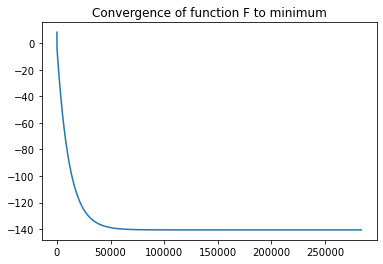

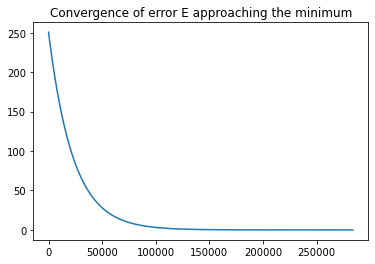

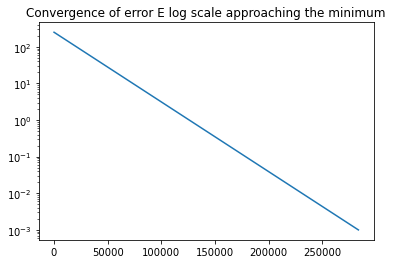

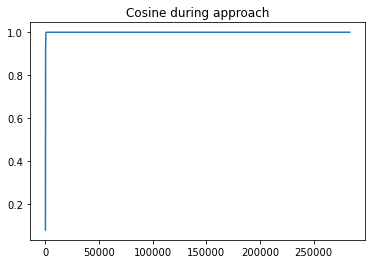

In [207]:
f,e,angl = vanilla_gradient_descent(Q,x,c)
plot_graphs(f,e,angl)

The minimum: [  69.6534206   -22.21411368 -104.49985726  105.55624419  -98.95421013
   -5.23230873   21.00977394  150.31831917  -10.30101623  -51.22140458]
[  69.65314155  -22.21401842 -104.4994411   105.55582569  -98.95381979
   -5.23228952   21.00968912  150.31771747  -10.30098148  -51.22120329]
42328


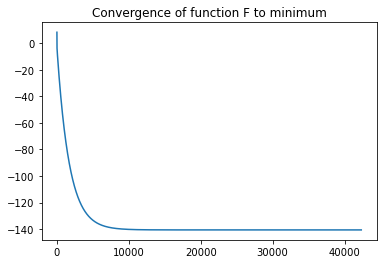

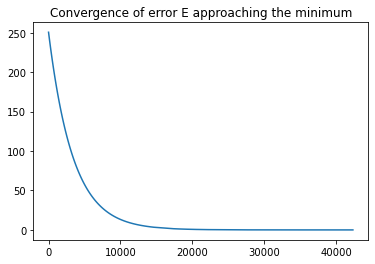

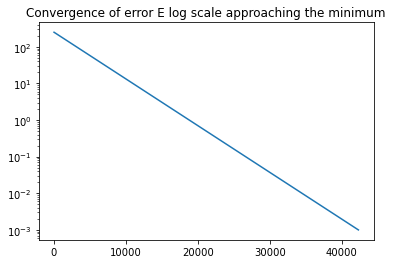

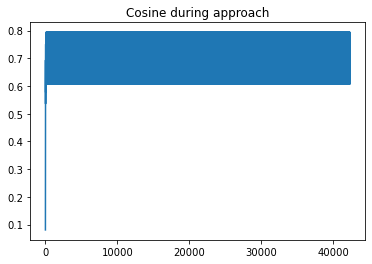

In [208]:
f,e,angl = alpha_optimized_gradient_descent(Q,x,c)
plot_graphs(f,e,angl)

The minimum: [  69.6534206   -22.21411368 -104.49985726  105.55624419  -98.95421013
   -5.23230873   21.00977394  150.31831917  -10.30101623  -51.22140458]
[  69.65314141  -22.21401834 -104.49944098  105.55582548  -98.95381965
   -5.23228948   21.00968905  150.31771724  -10.30098144  -51.22120318]
280859


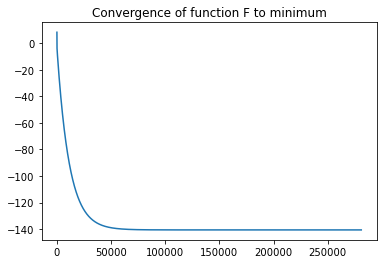

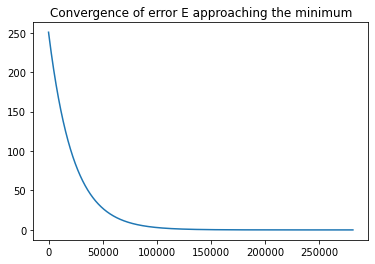

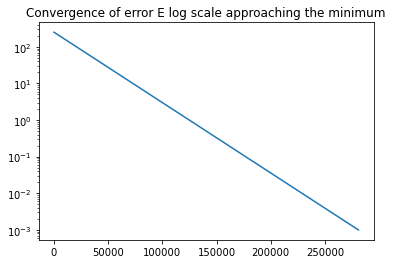

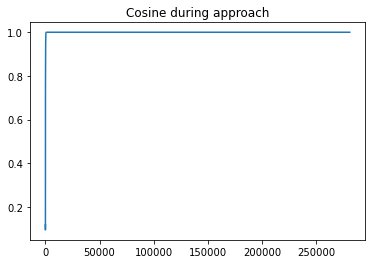

In [209]:
f,e,angl = momentum_gradient_descent(Q,x,c)
plot_graphs(f,e,angl)

The minimum: [  69.6534206   -22.21411368 -104.49985726  105.55624419  -98.95421013
   -5.23230873   21.00977394  150.31831917  -10.30101623  -51.22140458]
[  69.65315759  -22.21401276 -104.49946242  105.55585822  -98.95384403
   -5.23227288   21.00969498  150.3177428   -10.30099583  -51.22121864]
72


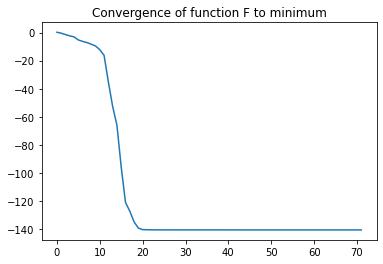

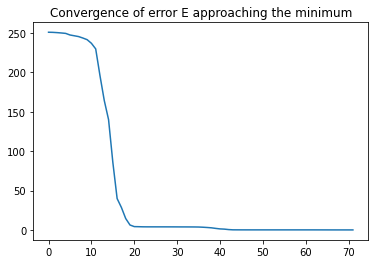

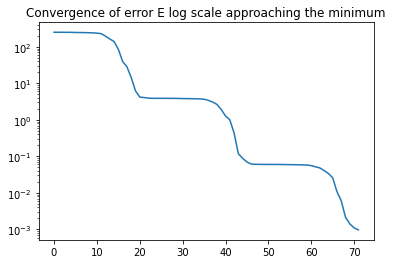

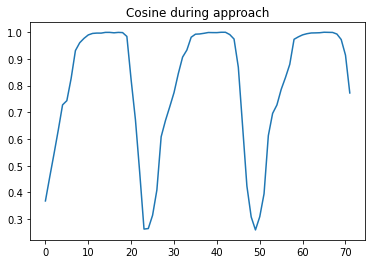

In [210]:
f,e,angl = optimized_momentum_gradient_descent(Q,x,c)
plot_graphs(f,e,angl)

The minimum: [  69.6534206   -22.21411368 -104.49985726  105.55624419  -98.95421013
   -5.23230873   21.00977394  150.31831917  -10.30101623  -51.22140458]
[  69.65314161  -22.21401847 -104.49944127  105.5558257   -98.95381949
   -5.23228947   21.00968915  150.31771758  -10.3009812   -51.22120291]
23640


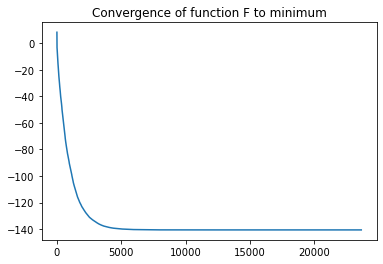

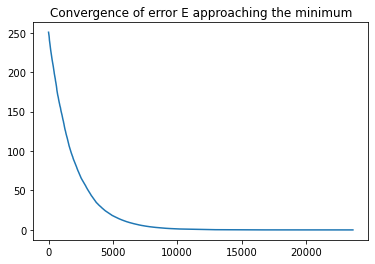

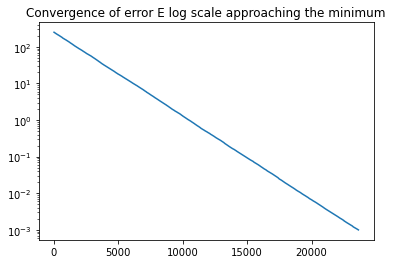

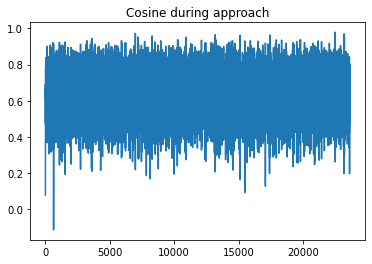

In [211]:
f,e,angl = orthogonal_momentum_gradient_descent(Q,x,c)
plot_graphs(f,e,angl)

In [212]:
# def compute_newx_2(x,alpha,gd):
#     return x + np.dot(alpha,gd)

In [213]:
# def conjugate_gradient_descent(Q,x,c):
#     f=[]
#     e=[]
#     angl = []
#     x_min = minimizer(Q,c)
#     d = np.dot(-1,compute_gd(Q,x,c))
#     g = compute_gd(Q,x,c)
#     alpha = np.dot(d,d)/np.dot(np.dot(d,Q),d)
#     for i in range(len(c)):
#         last = x
#         alpha = np.dot(np.dot(-1,g),d)/np.dot(np.dot(d,Q),d)
#         x = compute_newx_2(x,alpha,d)
#         f.append(compute_f(Q,x,c))
#         temp = np.linalg.norm(x_min - x)
#         e.append(temp)
#         angl.append((np.matmul(np.transpose(x - last),x_min - last))/((np.linalg.norm(x - last))*temp))
#         g = compute_gd(Q,x,c)
#         beta = np.dot(np.dot(g,Q),d)/np.dot(np.dot(d,Q),d)
#         d = np.dot(-1,np.subtract(g,np.dot(beta,d)))
#     return f,e,angl

In [ ]:
# f,e,angl = conjugate_gradient_descent(Q,x,c)
# plot_graphs(f,e,angl)